In [1]:
import numpy as np
import xarray as xr

import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt

import altair as alt
alt.data_transformers.enable('json')

from sublimpy import utils
from sublimpy import tidy
from sublimpy import extrautils
import glob

In [2]:
file_list = glob.glob("/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/*.nc")
file_list = [ f for f in file_list if '_20221222_' in f]
file_list = sorted(file_list)[7:19]
file_list

['/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20221222_07.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20221222_08.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20221222_09.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20221222_10.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20221222_11.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20221222_12.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20221222_13.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20221222_14.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/isfs_sos_qc_geo_tiltcor_hr_20221222_15.nc',
 '/Users/elischwat/

In [3]:
ds = xr.open_mfdataset(file_list, concat_dim="time", combine="nested")

In [4]:
ds = ds[[
    'base_time',
    
    'diagbits_10m_c',	'irgadiag_10m_c',	'ldiag_10m_c',
    'diagbits_10m_d',	'irgadiag_10m_d',	'ldiag_10m_d',
    'diagbits_10m_ue',	'irgadiag_10m_ue',	'ldiag_10m_ue',
    'diagbits_10m_uw',	'irgadiag_10m_uw',	'ldiag_10m_uw',
    'diagbits_15m_c',	'irgadiag_15m_c',	'ldiag_15m_c',
    # 'diagbits_1m_c',	'irgadiag_1m_c',	'ldiag_1m_c',
    # 'diagbits_1m_d',	'irgadiag_1m_d',	'ldiag_1m_d',
    # 'diagbits_1m_ue',	'irgadiag_1m_ue',	'ldiag_1m_ue',
    # 'diagbits_1m_uw',	'irgadiag_1m_uw',	'ldiag_1m_uw',
    'diagbits_20m_c',	'irgadiag_20m_c',	'ldiag_20m_c',
    'diagbits_2m_c',	'irgadiag_2m_c',	'ldiag_2m_c',
    'diagbits_3m_c',	'irgadiag_3m_c',	'ldiag_3m_c',
    'diagbits_3m_d',	'irgadiag_3m_d',	'ldiag_3m_d',
    'diagbits_3m_ue',	'irgadiag_3m_ue',	'ldiag_3m_ue',
    'diagbits_3m_uw',	'irgadiag_3m_uw',	'ldiag_3m_uw',
    'diagbits_5m_c',	'irgadiag_5m_c',	'ldiag_5m_c',

    # 'u_1m_c',	'v_1m_c',	'w_1m_c',	'h2o_1m_c',		'tc_1m_c',
    # 'u_1m_d',	'v_1m_d',	'w_1m_d',	'h2o_1m_d',		'tc_1m_d',
    # 'u_1m_ue',	'v_1m_ue',	'w_1m_ue',	'h2o_1m_ue',	'tc_1m_ue',
    # 'u_1m_uw',	'v_1m_uw',	'w_1m_uw',	'h2o_1m_uw',	'tc_1m_uw',
    'u_2m_c',	'v_2m_c',	'w_2m_c',	'h2o_2m_c',		'tc_2m_c',
    'u_3m_c',	'v_3m_c',	'w_3m_c',	'h2o_3m_c',		'tc_3m_c',
    'u_3m_d',	'v_3m_d',	'w_3m_d',	'h2o_3m_d',		'tc_3m_d',
    'u_3m_ue',	'v_3m_ue',	'w_3m_ue',	'h2o_3m_ue',	'tc_3m_ue',
    'u_3m_uw',	'v_3m_uw',	'w_3m_uw',	'h2o_3m_uw',	'tc_3m_uw',
    'u_5m_c',	'v_5m_c',	'w_5m_c',	'h2o_5m_c',		'tc_5m_c',
    'u_10m_c',	'v_10m_c',	'w_10m_c',	'h2o_10m_c',	'tc_10m_c',
    'u_10m_d',	'v_10m_d',	'w_10m_d',	'h2o_10m_d',	'tc_10m_d',
    'u_10m_ue',	'v_10m_ue',	'w_10m_ue',	'h2o_10m_ue',	'tc_10m_ue',
    'u_10m_uw',	'v_10m_uw',	'w_10m_uw',	'h2o_10m_uw',	'tc_10m_uw',
    'u_15m_c',	'v_15m_c',	'w_15m_c',	'h2o_15m_c',	'tc_15m_c',
    'u_20m_c',	'v_20m_c',	'w_20m_c',	'h2o_20m_c',	'tc_20m_c',
]]

# Create timestamp
To use the datam, its necessary to combine 3 columns of data from the dataset to get the full timestamp. This is demonstrated below. The 'time' column actually only incudes the second and minute information. For all datapoints, the hour according to the 'time' column is 1.  The 'base_time' column indicates the hour of the day. The 'sample' column indicates the 20hz sample number. 

We demonstrate this in the plots below

In [5]:
df1 = pd.DataFrame({'time': np.unique(ds['time'])})
df2 = pd.DataFrame({'base_time': np.unique(ds['base_time'])})
df3 = pd.DataFrame({'sample': np.unique(ds['sample'])})
(
    alt.Chart(df3).mark_tick(thickness=5).encode(
        alt.X("sample:Q").title(
            f'sample (n = {len(df3)})'
        )
    ).properties(width=600) & 

    alt.Chart(df1).mark_tick(thickness=1).encode(
        alt.X("time:T").axis(
            format='%H%M%p'
        ).title(
            f'time (n = {len(df1)})'
        )
    ).properties(width=600) & 

    alt.Chart(df2).mark_tick(thickness=5).encode(
        alt.X("base_time:T").title(
            f'base_time (n = {len(df2)})'
        )
    ).properties(width=600)
)

alt.VConcatChart(...)

In [6]:
df = ds.to_dataframe().reset_index()

In [7]:
df['time'] = df.apply(lambda row: dt.datetime(
        year = row['time'].year,
        month = row['time'].month,
        day = row['time'].day,
        hour = row['base_time'].hour,
        minute = row['time'].minute,
        second = row['time'].second,
        microsecond = int(row['sample'] * (1e6/20))
    ),
    axis = 1
)

In [8]:
ds = df.set_index('time').to_xarray()

In [9]:
import pytz
ds = utils.modify_xarray_timezone(ds, pytz.UTC, "US/Mountain")

# Calculate fluxes (implement Reynolds averaging)

In [11]:
def create_re_avg_ds(ds, re_avg_period_seconds, var1 = 'w_3m_c', var2='h2o_3m_c', covariance_name = 'w_h2o__3m_c'):
    coarse_ds = ds.coarsen(time=re_avg_period_seconds).mean()
    coarse_ds = coarse_ds.assign_coords(time = coarse_ds.time.dt.round('1s'))
    coarse_ds = coarse_ds.reindex_like(ds, method='nearest')
    ds[f"{var1}_mean"] = coarse_ds[f"{var1}"]
    ds[f"{var1}_fluc"] = ds[f"{var1}"] - ds[f"{var1}_mean"]
    ds[f"{var2}_mean"] = coarse_ds[f"{var2}"]
    ds[f"{var2}_fluc"] = ds[f"{var2}"] - ds[f"{var2}_mean"]
    ds[covariance_name] = ds[f"{var2}_fluc"] * ds[f"{var1}_fluc"]
    ds = ds.coarsen(time = re_avg_period_seconds).mean()
    ds = ds.assign_coords(time = ds.time.dt.round('1s'))
    return ds

In [12]:
ds_avg = create_re_avg_ds(ds, 20*60*5, 'w_3m_c', 'h2o_3m_c', 'w_h2o__3m_c')

In [50]:
tidy_df = pd.read_parquet("tidy_df_20221130_20230509_noplanar_fit.parquet")
tidy_df = tidy_df[tidy_df.variable.isin(['SF_avg_1m_ue', 'SF_avg_2m_ue','diags_3m_c'])].pivot(index='time', columns='variable', values='value')
tidy_df['SF_avg_ue'] = tidy_df[['SF_avg_1m_ue', 'SF_avg_2m_ue']].mean(axis=1)
tidy_df = tidy_df['SF_avg_ue'].loc["20221222 07":"20221222 19"]
tidy_df = utils.modify_df_timezone(tidy_df.reset_index(), pytz.UTC, "US/Mountain").set_index('time')

Text(0, 0.5, 'Blowing snow flux\n(g/m^2/s)')

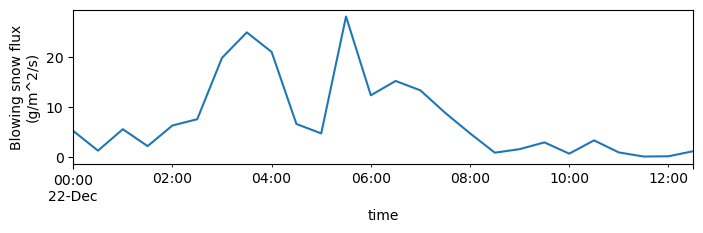

In [54]:
tidy_df['SF_avg_ue'].plot(figsize=(8,2))
plt.ylabel("Blowing snow flux\n(g/m^2/s)")

Text(0, 0.5, 'Anemometer flag\nFraction of time w/ flags')

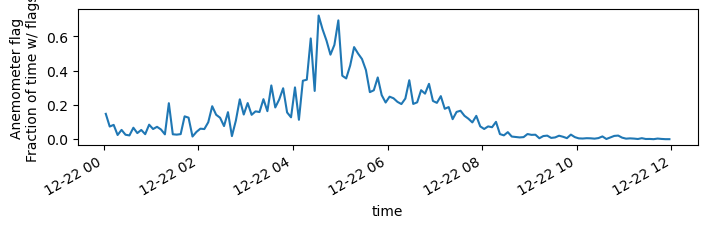

In [57]:
ds_avg['ldiag_3m_c'].to_dataframe()['ldiag_3m_c'].plot(figsize=(8,2))
plt.ylabel("Anemometer flag\nFraction of time w/ flags")

Text(0, 0.5, 'Irgason flag')

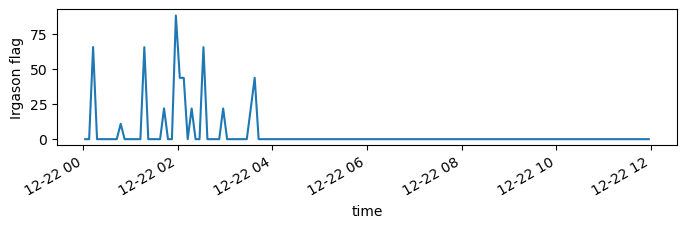

In [58]:
ds_avg['irgadiag_3m_c'].to_dataframe()['irgadiag_3m_c'].plot(figsize=(8,2))
plt.ylabel("Irgason flag")

Text(0, 0.5, 'H_l (g/m^2/s)')

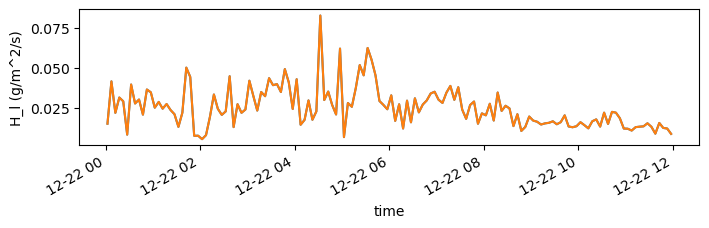

In [60]:
plt.plot(ds_avg.to_dataframe()['w_h2o__3m_c'])
ds_avg['w_h2o__3m_c'].to_dataframe()['w_h2o__3m_c'].plot(figsize=(8,2))
plt.ylabel("H_l (g/m^2/s)")